In [12]:
# Симметричная точка
def symm_dot(d, d_0):
    x, y = d
    x_0, y_0 = d_0
    return vector((-x+2*x_0, -y+2*y_0))


# С изменением этого множества и маленькими
# изменениями везде по коду можно изучать внешние бильярды
# вообще всех выпуклых многоугольников
DOTS = [vector((1, 0)),
        vector((cos(2*pi/7), sin(2*pi/7))),
        vector((cos(4*pi/7), sin(4*pi/7))),
        vector((cos(6*pi/7), sin(6*pi/7))),
        vector((cos(8*pi/7), sin(8*pi/7))),
        vector((cos(10*pi/7), sin(10*pi/7))),
        vector((cos(12*pi/7), sin(12*pi/7)))]


# вектор, повёрнутый на 90 градусов
def rotten(dot):
    x_0, y_0 = dot
    return vector((-y_0, x_0))


# нормали всех прямых, ограничивающие области
# а PEP 8 математикам не нужен
NORMALS = {(dot0, dot1): rotten(DOTS[dot0]-DOTS[dot1]) for dot0 in range(7) for dot1 in range(7)}


# от значения это функции нужен только знак
# от него зависит положение точки относительно прямой
def hplane(dot0, dot1, x, y):
    return NORMALS[(dot0, dot1)].dot_product(vector((x, y)) - DOTS[dot0])


# DRY being not so horribly violated
# отображение внешнего бильярда (o_uter b_illiard)
def ob(dot):
    x, y = dot
    for i in Zmod(7):
        if hplane(i, i+1, x, y) < 0 and hplane(i, i-1, x, y) < 0:
            return symm_dot(dot, DOTS[i])
    raise NotImplementedError()


# почти обратное отображение
def ob_inv(dot):
    x, y = dot
    for i in Zmod(7):
        if hplane(i, i+1, x, y) > 0 and hplane(i, i-1, x, y) > 0:
            return symm_dot(dot, DOTS[i])
    return dot # ob_inv is for drawing, and b dots have to be on the plot anyway


# находит номер области, соответствующий номеру точки, относительно
# которой отражает ob
def locate_dot(dot):
    x, y = dot
    for i in Zmod(7):
        if hplane(i, i+1, x, y) > 0 and hplane(i, i-1, x, y) > 0:
            return f"{i}"
    return "B"


# генератор орбиты
def orbit_ob(d, n):
    for _ in range(n):
        yield d
        d = ob(d)


# маршрут
def trace_ob(d, n):
    return "".join([locate_dot(i) for i in orbit(d, n)])



Пример 1: Подсчёт периода орбиты
========



In [13]:
start_dot = vector((1, 1))
dot = start_dot
n = 1
while True:
    dot = ob(dot)
    if dot == start_dot:
        print(n)
        break
    else:
        n += 1
        if n % 100 == 0:
            print(n)

14


Пример 2: Граничные точки
=======

0
1
2
3
4
5


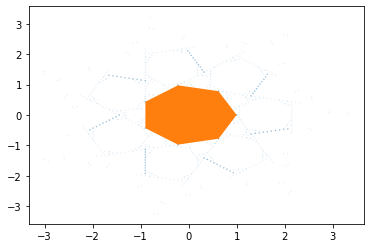

In [14]:
from multiprocessing import Pool
from time import time
import mpld3
import matplotlib.pyplot as plt

EXEC_TIME = 120
STEP = 0.1
END = 2.0
DOT_SIZE = 1

rays = [DOTS[0] + (DOTS[0] - DOTS[1])*i for i in [0.0,STEP,..,END]]
next_rays = rays.copy()

start = time()
i = 0
while time() - start < EXEC_TIME:
    print(i) # выводит количество произведённых итераций
    i += 1
    with Pool() as p:
        next_rays = list(p.imap_unordered(ob_inv, next_rays, 1024))
        rays += next_rays

colors = ['red', 'blue', 'green', 'brown', '']

to_plot = [vector((x*cos(2*pi*i/7) - y*sin(2*pi*i/7), x*sin(2*pi*i/7) + y*cos(2*pi*i/7))) for x, y in rays for i in range(7)]

plt.scatter(*zip(*to_plot), [DOT_SIZE]*len(to_plot), marker='.')
plt.fill(*zip(*DOTS))
# сохранит это хрен знает где
mpld3.save_html(plt.gcf(), 'discount_7gon.html')
save(to_plot, 'dicsount_7gon')

Пример 3: Рисования орбит
=====

Нужно выполнить перед этим пример 2